In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

In [37]:

# Generating data points
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]  
noise = np.random.normal(0, 0.02, x_data.shape)  
y_data = np.square(x_data) + noise 




In [39]:
# Spliting dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
# a. Linear Regression Model train
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [41]:
# a. Linear Regression Model test and square error
y_pred_linear = linear_model.predict(x_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)

In [43]:
# b. Polynomial Model (Degree 2)
poly_features = PolynomialFeatures(degree=2)
x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)
y_pred_poly = poly_model.predict(x_poly_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)


In [45]:
# c. Neural Network Model (3 layers: input, 1 hidden, output)
nn_model = Sequential()
nn_model.add(Dense(units=6, activation='relu', input_dim=1))
nn_model.add(Dense(units=1))

nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(x_train, y_train, epochs=300, verbose=0)

y_pred_nn = nn_model.predict(x_test)


mse_nn = mean_squared_error(y_test, y_pred_nn)



C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002035248CC20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [27]:
# Print MSEs for comparison
print(f"Linear Regression MSE: {mse_linear}")
print(f"Polynomial Regression (Degree 2) MSE: {mse_poly}")
print(f"Neural Network MSE: {mse_nn}")

Linear Regression MSE: 0.006017658799747559
Polynomial Regression (Degree 2) MSE: 0.0002935703893909157
Neural Network MSE: 0.00040068055620271945


In [35]:
## E
#plt.scatter(x_data, y_data, color='blue', label='True Data')
#plt.plot(x_test, y_pred_linear, color='green', label='Linear Regression')


In [25]:
#plt.scatter(x_data, y_data, color='blue', label='True Data')
#plt.plot(x_test, y_pred_poly, color='red', label='Polynomial Regression (Degree 2)')
##plt.legend()
##plt.show()

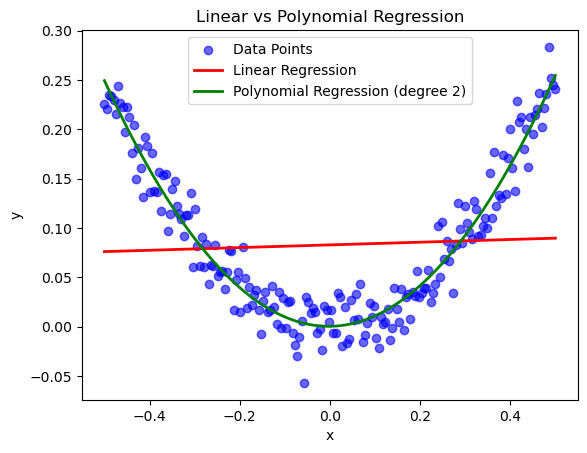

In [46]:
#  Making predictions for plotting
x_plot = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]  # Using the same x range for plotting
y_linear_pred = linear_model.predict(x_plot)
x_plot_poly = poly_features.transform(x_plot)  # Transforming x_plot for polynomial regression
y_poly_pred = poly_model.predict(x_plot_poly)
#  Ploting the data points and the predictions
plt.scatter(x_data, y_data, color='blue', label='Data Points', alpha=0.6)  # Plotting original data points

# Plotting linear regression predictions
plt.plot(x_plot, y_linear_pred, color='red', label='Linear Regression', linewidth=2)

# Plotting polynomial regression predictions
plt.plot(x_plot, y_poly_pred, color='green', label='Polynomial Regression (degree 2)', linewidth=2)

# Plotting labels and legend
plt.title('Linear vs Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()